In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')
from hms_pipeline.project_configs import HMS_CONFIG, SIGNAL_NAME, EEG_FEATS
from hms_pipeline.spec_dataset import load_raw_eeg, get_center_raw_eeg

/home/maxc/miniconda3/envs/unet-seg/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/maxc/miniconda3/envs/unet-seg/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit 

In [2]:
def eeg_to_signals(eeg_path):


    eeg_df = pd.read_parquet(eeg_path)
    eeg_signal_dict = dict()
    signal_df = pd.DataFrame()
    for k in range(len(SIGNAL_NAME)):
        cols = EEG_FEATS[k]
        signal_name = SIGNAL_NAME[k]
        for kk in range(len(cols) - 1):
            sub_signal_name = f"{signal_name}_{cols[kk]}-{cols[kk+1]}"
            x = eeg_df[cols[kk]].values - eeg_df[cols[kk + 1]].values
            m = np.nanmean(x)
            if np.isnan(x).mean() < 1:
                x = np.nan_to_num(x, nan=m)
            signal_df[sub_signal_name] = x
    return signal_df

In [3]:
eeg_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs"

In [4]:
eeg_id = 1628180742
eeg_id = 4070165861
# eeg_id = 722738444
# eeg_id = 2277392603
# eeg_id = 387987538
eeg_path = os.path.join(eeg_dir, f"{eeg_id}.parquet")

In [5]:
eeg_df = pd.read_parquet(eeg_path)
eeg_df.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,20.200001,-2.66,-17.010000,-9.300000,7.18,-16.219999,-21.270000,-14.360000,5.85,-2.66,11.70,7.44,11.17,-13.560000,-24.190001,-15.42,-1.86,-46.259998,-2.66,10.37
1,17.010000,-7.18,-22.860001,-15.950000,6.38,-18.340000,-27.120001,-17.549999,1.60,-8.24,9.57,2.13,6.38,-19.410000,-27.650000,-13.82,-2.13,-46.790001,-4.52,3.73
2,25.250000,-3.99,-24.459999,-17.549999,11.43,-17.809999,-28.709999,-19.139999,5.85,-10.90,8.51,6.91,8.51,-22.600000,-30.840000,-13.29,-9.84,-49.709999,-6.11,3.72
3,27.120001,1.60,-17.280001,-14.890000,13.29,-18.340000,-29.510000,-17.549999,11.17,-5.05,12.76,12.76,12.76,-17.549999,-26.580000,-12.49,-1.86,-44.400002,-0.80,-3.99
4,22.059999,0.00,-15.420000,-14.620000,11.96,-14.090000,-29.510000,-18.870001,8.51,-1.06,15.95,9.84,10.37,-18.870001,-27.650000,-13.29,-5.32,-45.459999,0.53,-12.23


In [6]:
eeg_df.describe()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,-5.451116,-9.772363,-9.980470,0.698436,1.932520,-8.205272,-28.109634,-22.063568,1.826628,-5.357316,18.235954,-6.306281,5.696295,-17.462048,-4.175815,-14.458573,-2.788224,-24.630251,5.067723,-3.028795
std,113.009186,146.570892,82.059944,67.686897,84.538528,76.735939,77.631737,113.595436,85.894783,67.737633,67.221161,216.991089,115.290108,158.623260,85.160362,83.116798,79.776321,76.869293,82.967323,37.221951
min,-931.760010,-1141.250000,-908.369995,-663.530029,-628.440002,-645.190002,-828.349976,-992.380005,-718.830017,-573.679993,-538.590027,-1852.099976,-808.150024,-1184.310059,-512.539978,-548.429993,-538.320007,-506.690002,-489.940002,-318.209991
25%,-53.169998,-48.380001,-45.459999,-28.709999,-41.740002,-52.900002,-47.849998,-52.900002,-37.480000,-39.880001,-15.420000,-58.480000,-38.810001,-55.560001,-48.380001,-55.560001,-40.669998,-68.589996,-30.040001,-22.059999
50%,-4.520000,-10.630000,-14.890000,-4.520000,-9.570000,-22.600000,-26.049999,-18.610001,0.270000,-9.040000,13.290000,1.860000,3.190000,-14.360000,-12.490000,-14.090000,-7.440000,-38.009998,3.460000,-7.180000
75%,48.119999,40.939999,23.660000,25.250000,37.220001,22.330000,-3.720000,18.080000,41.470001,22.860001,44.400002,71.779999,48.119999,37.750000,31.370001,27.782500,30.375000,7.180000,43.330002,10.900000
max,542.580017,476.380005,409.390015,384.929993,544.969971,504.559998,386.799988,438.369995,458.309998,446.079987,463.089996,645.190002,463.890015,442.619995,448.739990,444.220001,433.579987,431.459991,464.420013,282.850006


In [7]:
signal_df = eeg_to_signals(eeg_path)

In [8]:
signal_df.describe()

,LL_Fp1-F7,LL_F7-T3,LL_T3-T5,LL_T5-O1,RL_Fp2-F8,RL_F8-T4,RL_T4-T6,RL_T6-O2,LP_Fp1-F3,LP_F3-C3,LP_C3-P3,LP_P3-O1,RP_Fp2-F4,RP_F4-C4,RP_C4-P4,RP_P4-O2,ML_Fz-Cz,ML_Cz-Pz
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,-7.383636,10.137791,19.904364,-6.046066,8.152293,-11.670350,21.842026,-29.697973,4.321245,0.208110,-10.678906,22.762001,-12.002574,23.158340,-13.286232,-9.243537,7.183943,-23.593271
std,66.562378,50.451778,55.605766,119.862488,192.961517,52.502869,40.282955,68.738953,129.591049,106.467056,37.960560,107.305267,143.409866,77.908623,137.494446,64.446213,44.846260,21.462019
min,-762.419983,-438.369995,-138.500000,-364.460022,-1613.380005,-355.950012,-288.970001,-248.029999,-596.540039,-1050.330078,-295.339996,-277.539978,-1429.679932,-224.900009,-1253.969971,-190.339996,-324.049988,-94.109993
25%,-29.510000,-5.849998,-14.880001,-39.080002,-18.080002,-33.759998,-1.330000,-60.610001,-26.060002,-11.700001,-21.530003,-12.230000,-33.230003,-11.429993,-23.660000,-39.870003,-3.449997,-38.279999
50%,5.310001,16.480001,5.050000,-6.380001,17.809999,-10.100002,23.920000,-38.010002,10.369995,3.855000,-9.040001,13.560001,-4.260006,14.350000,2.129999,-16.219999,11.970000,-24.459999
75%,26.319996,36.680000,37.750000,20.200001,64.870003,11.170000,46.520000,-11.170000,35.360001,18.340000,4.260000,40.669998,30.374995,35.360001,27.650002,5.050003,28.440001,-11.700000
max,219.050003,531.669983,510.940002,1021.890015,456.450012,231.020004,315.549988,320.600006,1285.330078,393.709991,105.009995,1022.419983,423.479980,614.890015,433.579987,280.459991,146.479996,90.390007


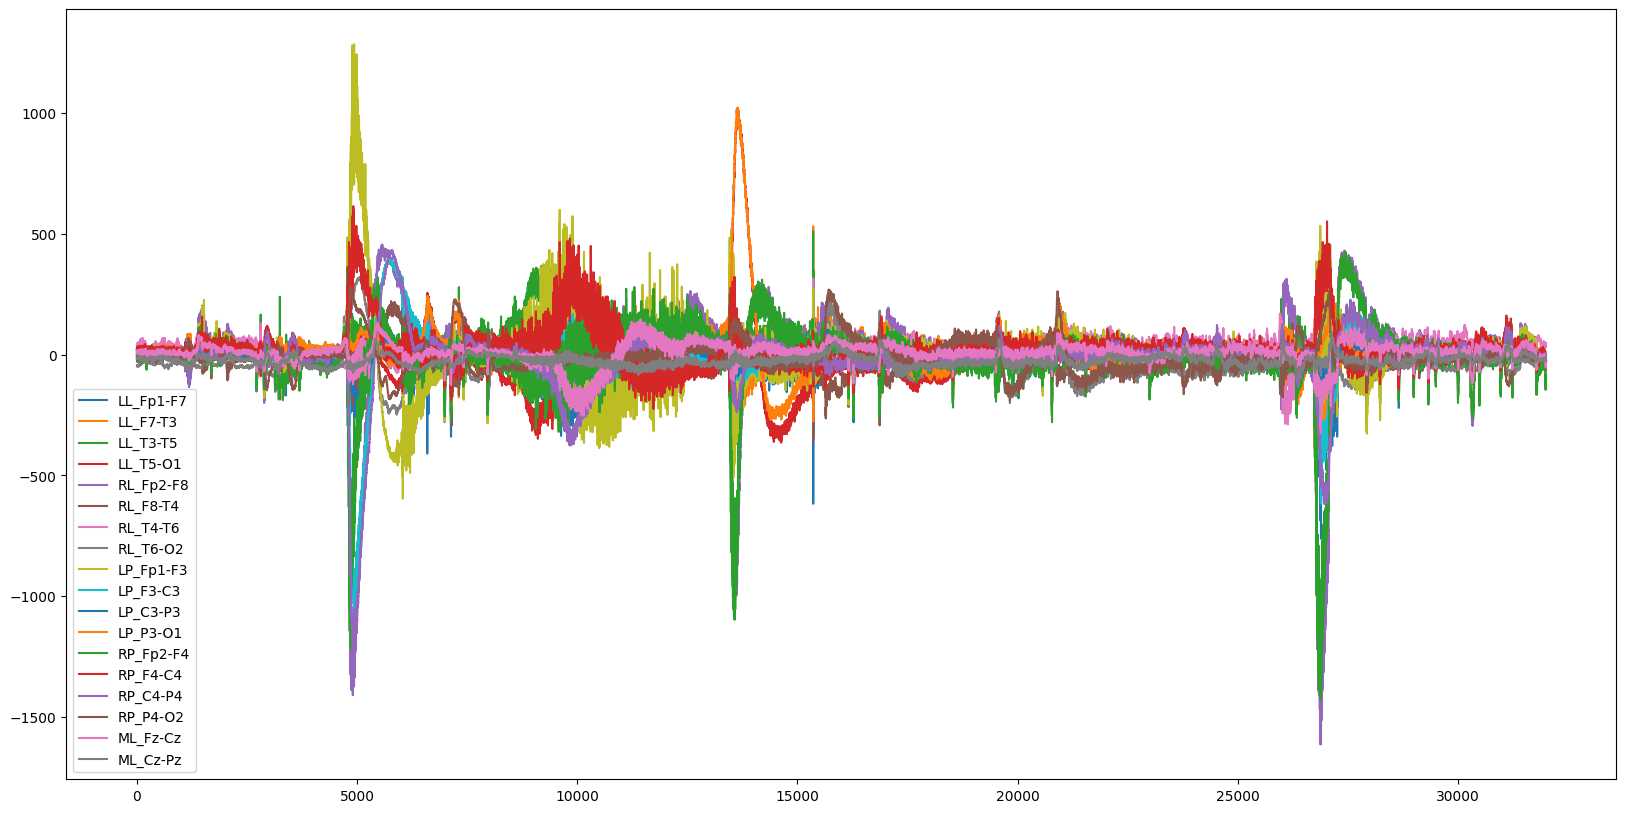

In [9]:
# plot the signals in the same plot

plt.figure(figsize=(20, 10))
for col in signal_df.columns:
    plt.plot(signal_df[col].values, label=col)
plt.legend()
plt.show()

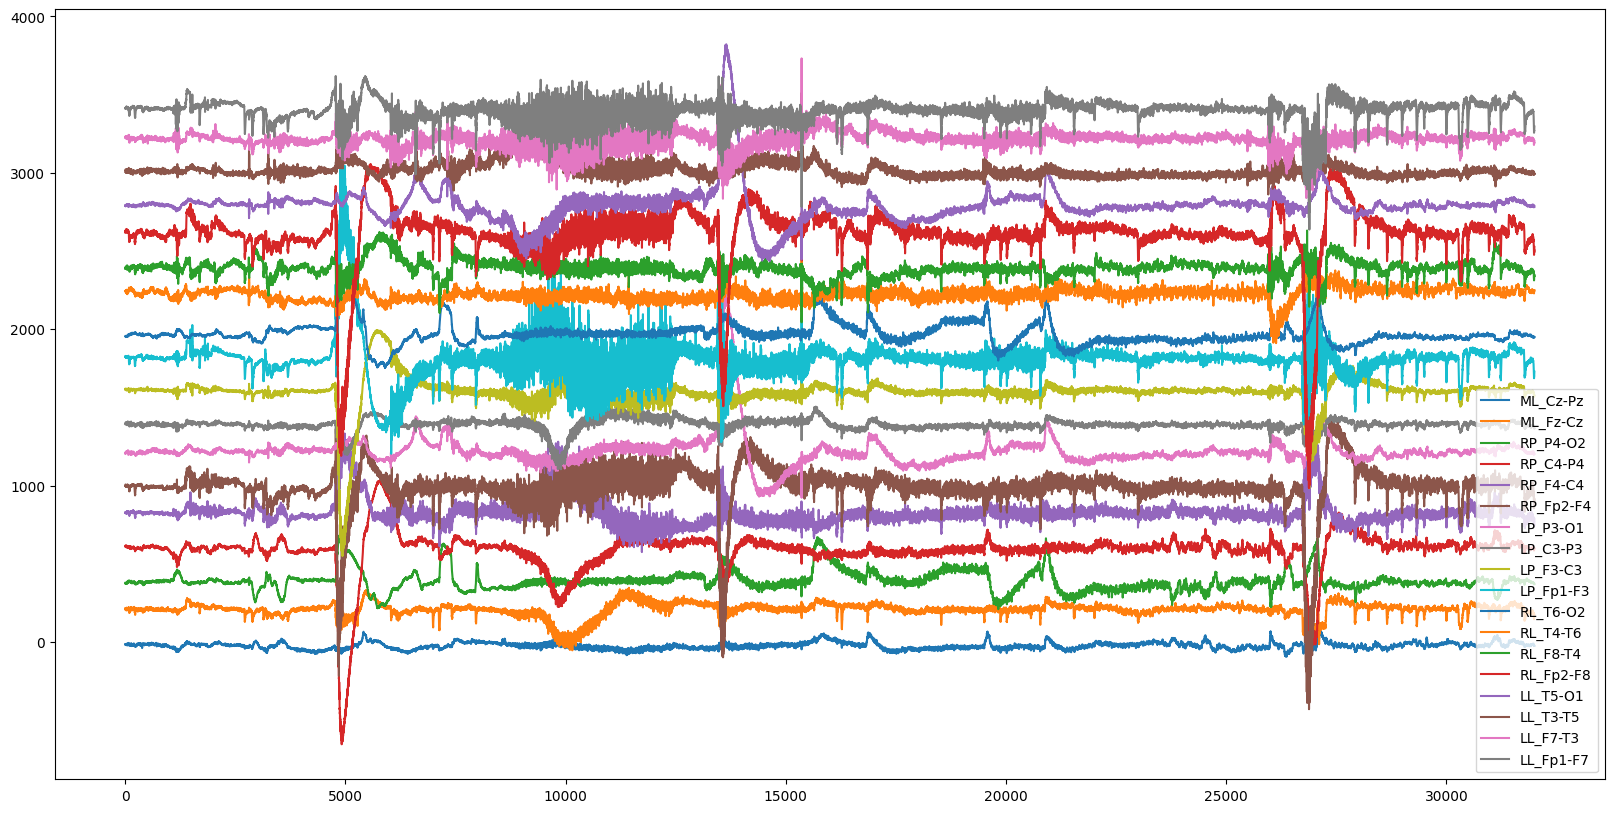

In [10]:
# plot the signals in the same plot, not overlapping, 

plt.figure(figsize=(20, 10))
# for i, col in enumerate(signal_df.columns):
# iter the columns in reverse order
for i, col in enumerate(signal_df.columns[::-1]):
    plt.plot(signal_df[col].values + i*200, label=col)
plt.legend()

In [11]:
def get_center_raw_eeg_dict(eeg_signal_dict, offset_sec=0):
    num_row_per_sec = 200
    center_offset_sec = offset_sec + 20
    center_len = 10

    col_start = int(center_offset_sec * num_row_per_sec)
    center_raw_eeg_dict = dict()
    for key, value in eeg_signal_dict.items():
        signal_data = value.values
        signal_data = signal_data[col_start : col_start + num_row_per_sec * center_len]
        center_raw_eeg_dict[key] = signal_data
        
    return center_raw_eeg_dict


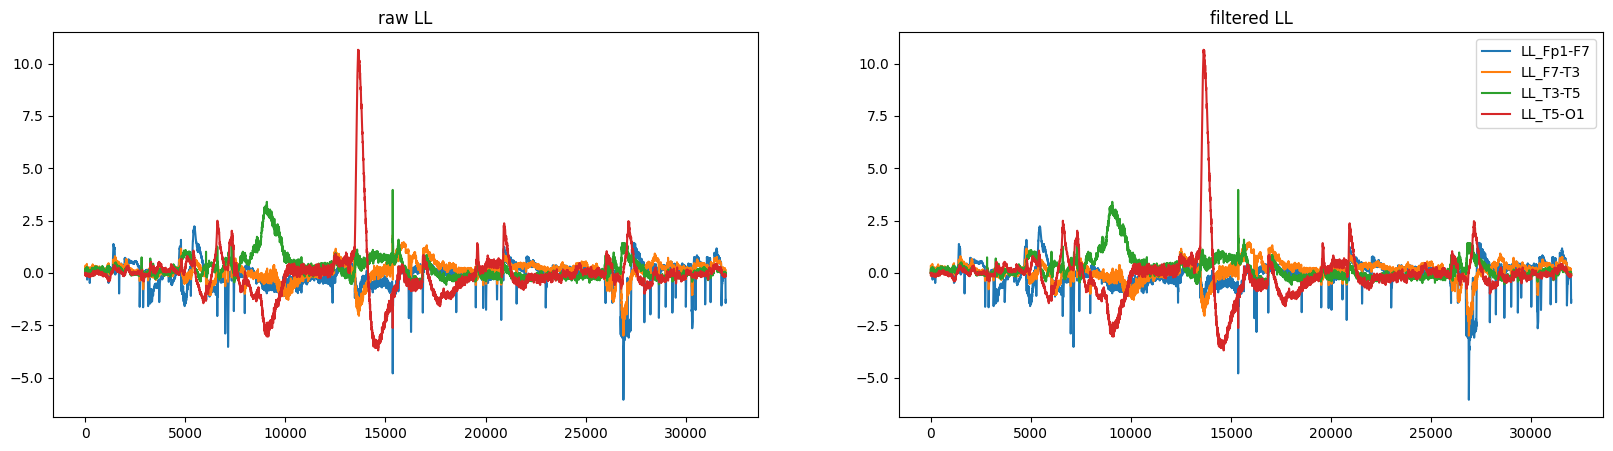

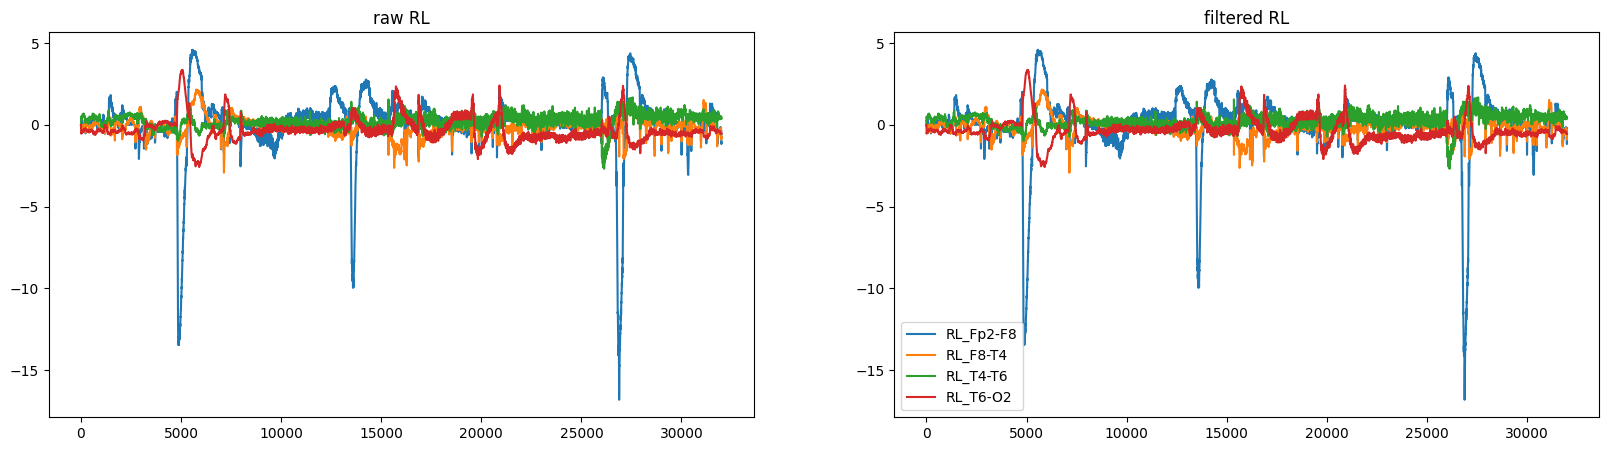

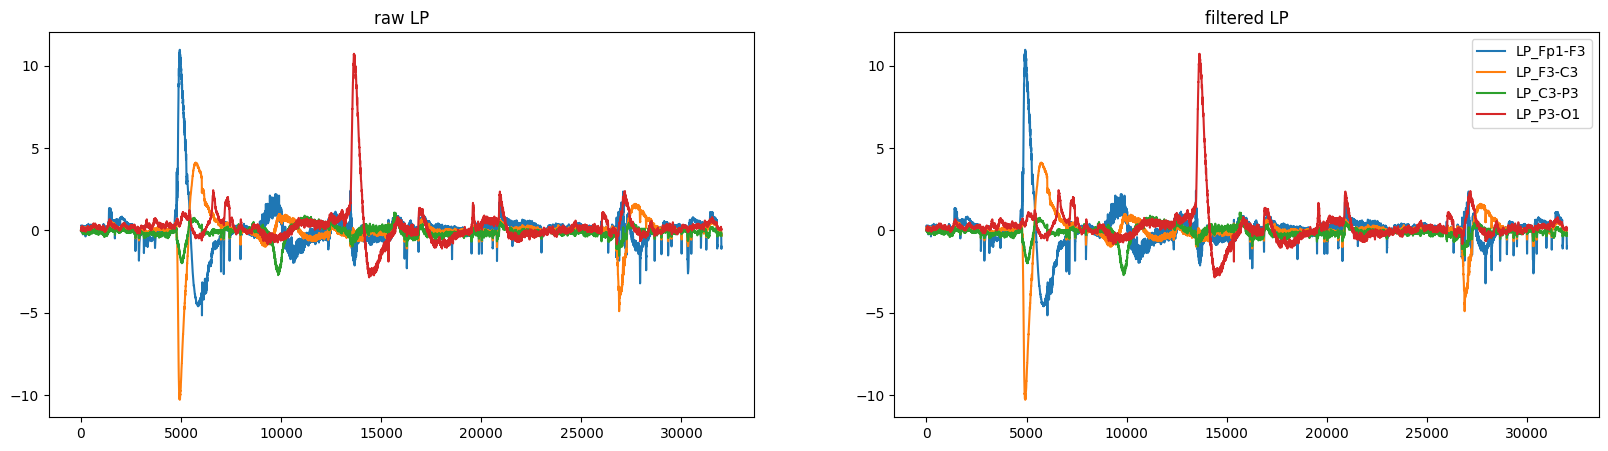

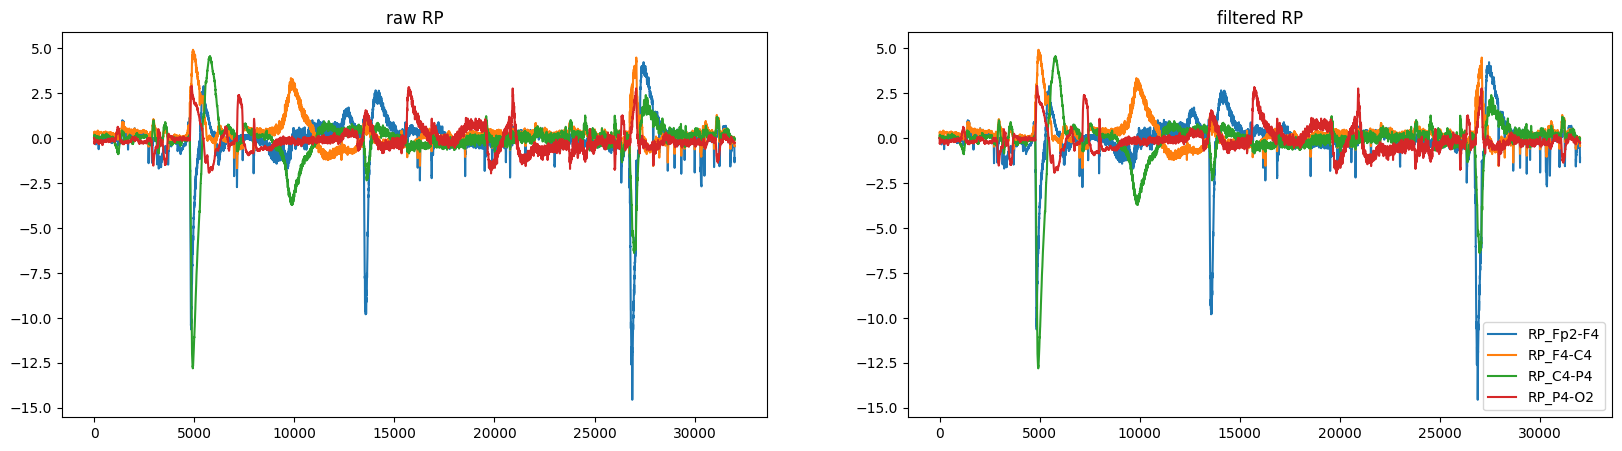

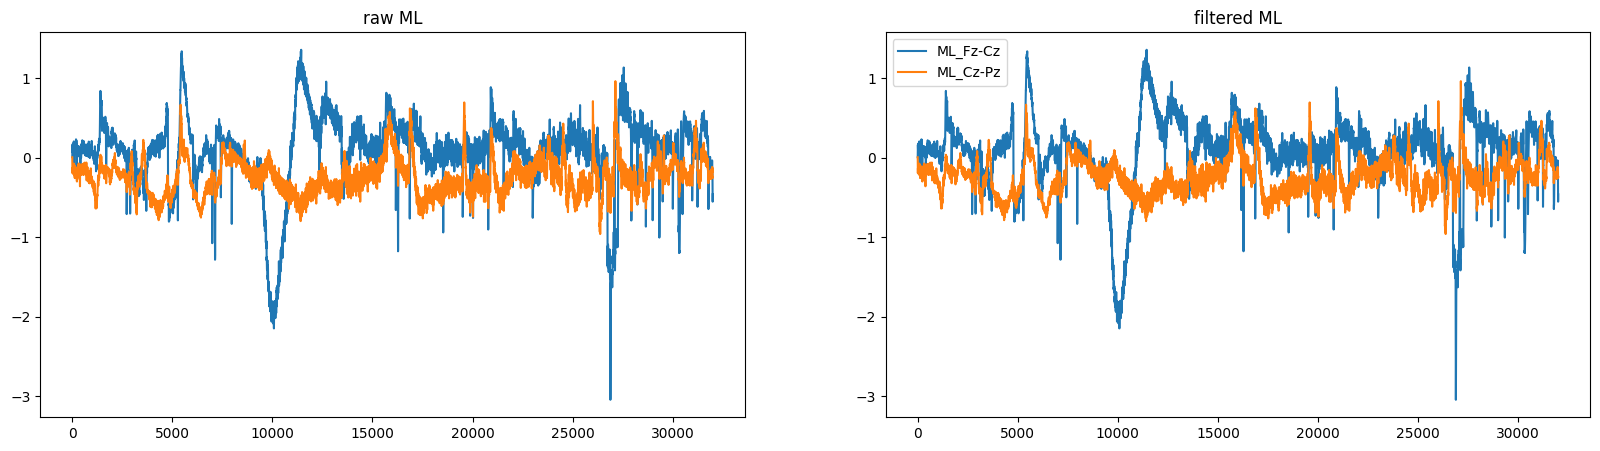

In [12]:
raw_eeg_dict = load_raw_eeg(eeg_path, filter=False)
raw_eeg_dict_filtered = load_raw_eeg(eeg_path, filter=True)

# center_eeg_dict = get_center_raw_eeg(raw_eeg_dict)
for key in raw_eeg_dict.keys():
    sub_signal_df = raw_eeg_dict[key]
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    for col in sub_signal_df.columns:
        plt.plot(sub_signal_df[col].values, label=col)
        plt.title(f"raw {key}")
    plt.subplot(1, 2, 2)
    sub_signal_df = raw_eeg_dict_filtered[key]
    for col in sub_signal_df.columns:
        plt.plot(sub_signal_df[col].values, label=col)
        plt.title(f"filtered {key}")
    plt.legend()

In [13]:
from scipy.signal import butter, sosfilt, sosfreqz, lfilter, sosfiltfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs=200, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfiltfilt(sos, data)
        return y

def butter_lowpass_filter(data, cutoff_freq=20, sampling_rate=200, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    filtered_data = lfilter(b, a, data, axis=0)
    return filtered_data

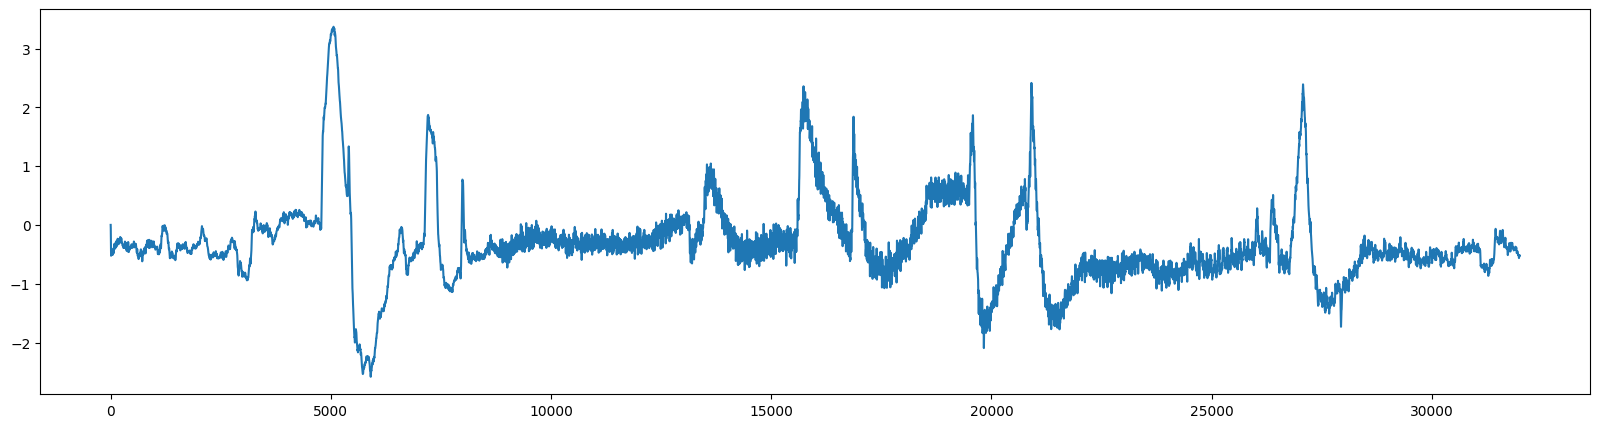

In [14]:
# center_eeg_dict = get_center_raw_eeg(raw_eeg_dict)

test_key = "RP"
test_column = "RP_C4-P4"
test_key = "LL"
test_column = "LL_F7-T3"
test_key = "RL"
test_column = "RL_T6-O2"
test_signal = raw_eeg_dict[test_key][test_column].values
plt.figure(figsize=(20, 5))
plt.plot(test_signal)
plt.show()    
  

In [15]:
eeg_ranges = [(0.001,4), (4,8), (8,13), (13,20)]

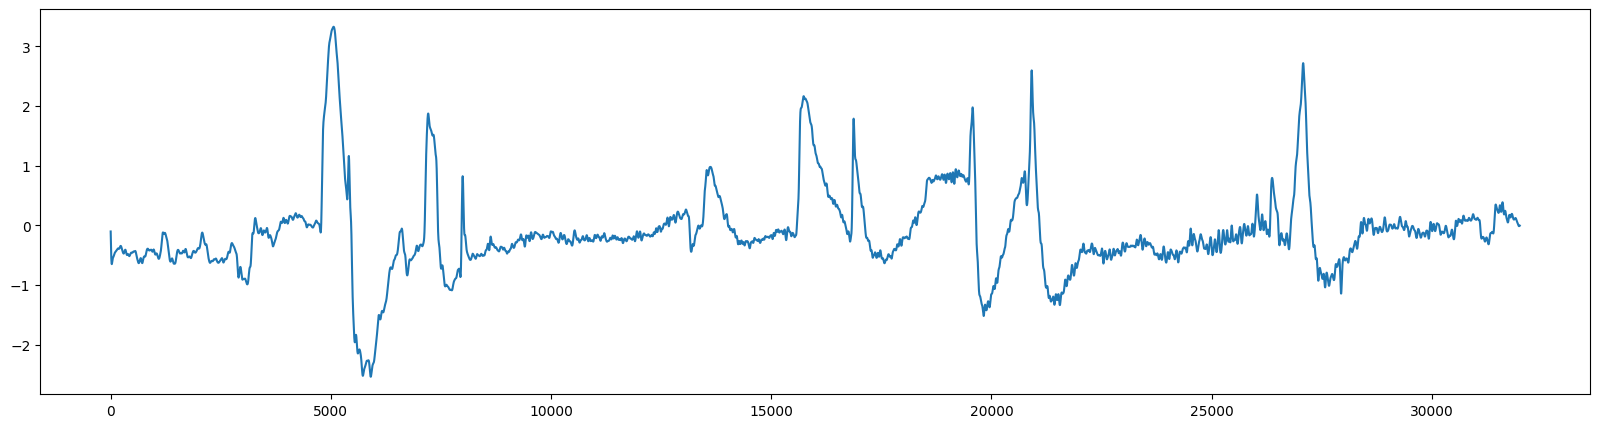

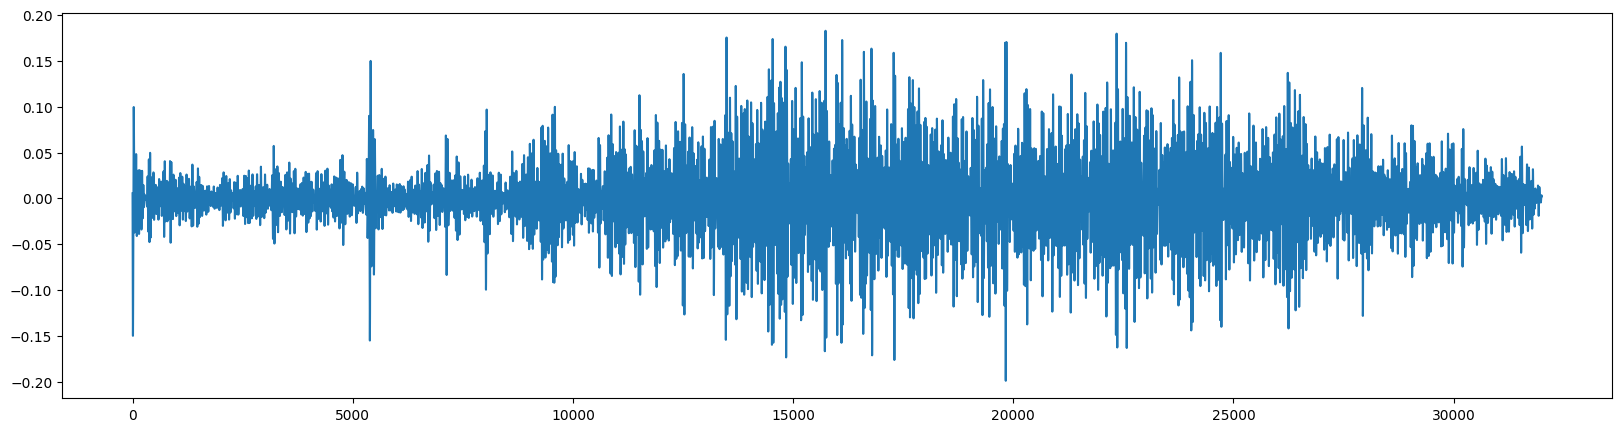

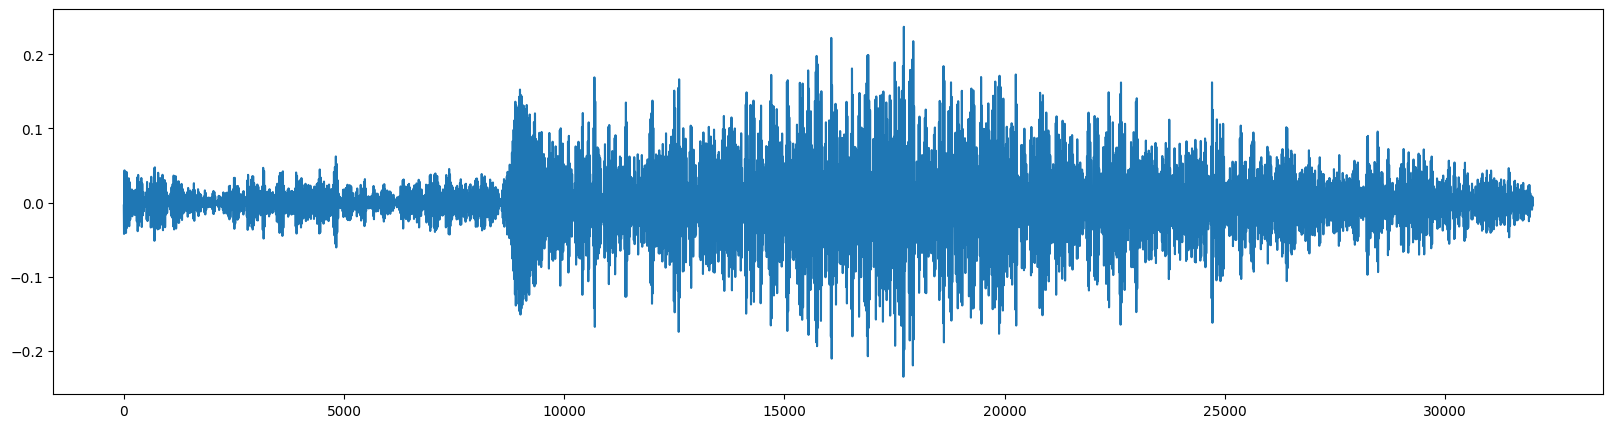

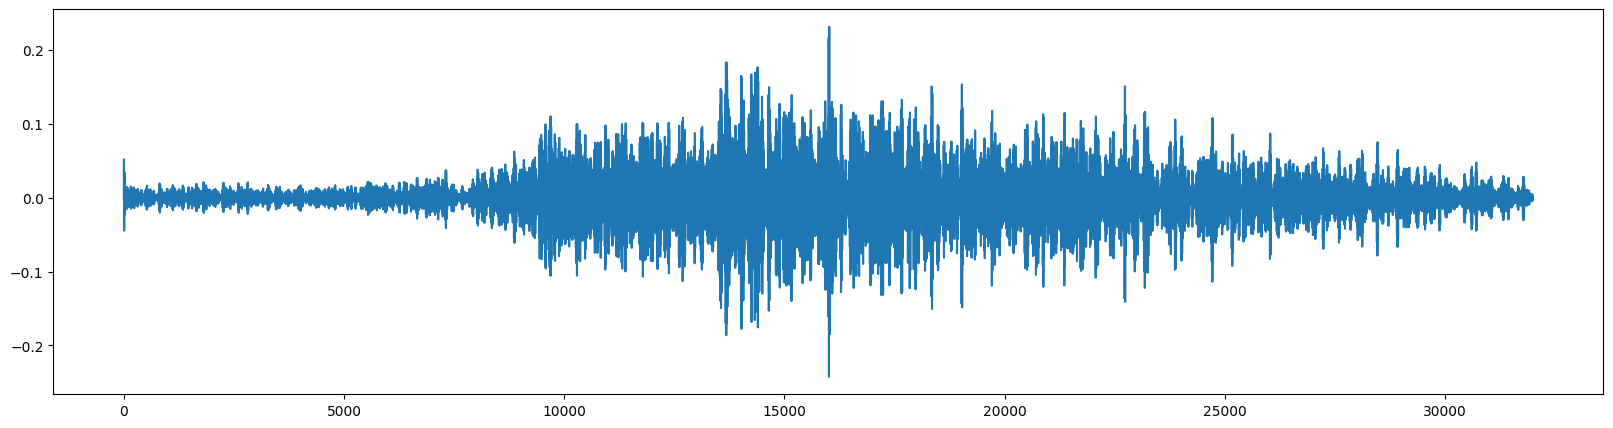

In [16]:
for low, high in eeg_ranges:
    filtered_signal = butter_bandpass_filter(test_signal, low, high, 200, order=4)
    plt.figure(figsize=(20, 5))
    plt.plot(filtered_signal)
    plt.show()